In [2]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [10]:
paths=["TSD_BsX_15k_each_6trees_charge/1024_0.001_128_0.3_8",
       "TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_1024_0.3_4",
       "TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_512_0.3_4"]
prefix=["run_BsX/","run_BsXHc/","run_BsXHc/"]

for i in range(len(paths)):
    print(paths[i])
    plotname_extension = paths[i]
    
    nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/" + prefix[i]

    plot_path = "/afs/desy.de/user/a/axelheim/private/" + prefix[i]


    data_dir = Path((nfs_path + 'tb_logs/' + paths[i]))

    csv_dir = Path((nfs_path + 'tb_csv/' + paths[i]))
    csv_dir.mkdir(parents=True, exist_ok=True)

    plot_path = Path((plot_path + 'plots/' + paths[i]))
    plot_path.mkdir(parents=True, exist_ok=True)

    tb_metrics = tabulate_metrics(data_dir, csv_dir)


    # choosing the tb_log with the most epochs recorded
    epochs = []
    for i in range(len(tb_metrics)):
        epochs.append(len(tb_metrics[i]))
        print(epochs[i])
        
    most_epochs_idx = 0
    if len(tb_metrics) > 1:
        most_epochs_idx = epochs.index(max(epochs))
        
    print(most_epochs_idx)
    print(len(tb_metrics))
    if len(tb_metrics) > 0:
        longest_run = tb_metrics[most_epochs_idx]

TSD_BsX_15k_each_6trees_charge/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1626182919.batchg013.desy.de.100249.0

- Done
Converting run events.out.tfevents.1624041950.batchg010.desy.de.99667.0

- Done
Converting run events.out.tfevents.1626181697.batchg002.desy.de.242214.0

Run events.out.tfevents.1626181697.batchg002.desy.de.242214.0 is empty, didn't process it 

151
88
0
2
TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_1024_0.3_4
Converting run events.out.tfevents.1626182308.batchg013.desy.de.97045.0

Run events.out.tfevents.1626182308.batchg013.desy.de.97045.0 is empty, didn't process it 

Converting run events.out.tfevents.1626183098.batchg011.desy.de.128487.0

Run events.out.tfevents.1626183098.batchg011.desy.de.128487.0 is empty, didn't process it 

0
0
TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_512_0.3_4
Converting run events.out.tfevents.1626183098.batchg012.desy.de.96931.0

- Done
Converting run events.out.tfevents.1626182305.batchg012.desy.de.91718.0

- Done

In [21]:
longest_run["Time/secs)"] - longest_run["Time/secs)"][0]

0          0.0
1        384.0
2        768.0
3       1280.0
4       1664.0
        ...   
146    62592.0
147    62976.0
148    63360.0
149    63872.0
150    64256.0
Name: Time/secs), Length: 151, dtype: float64

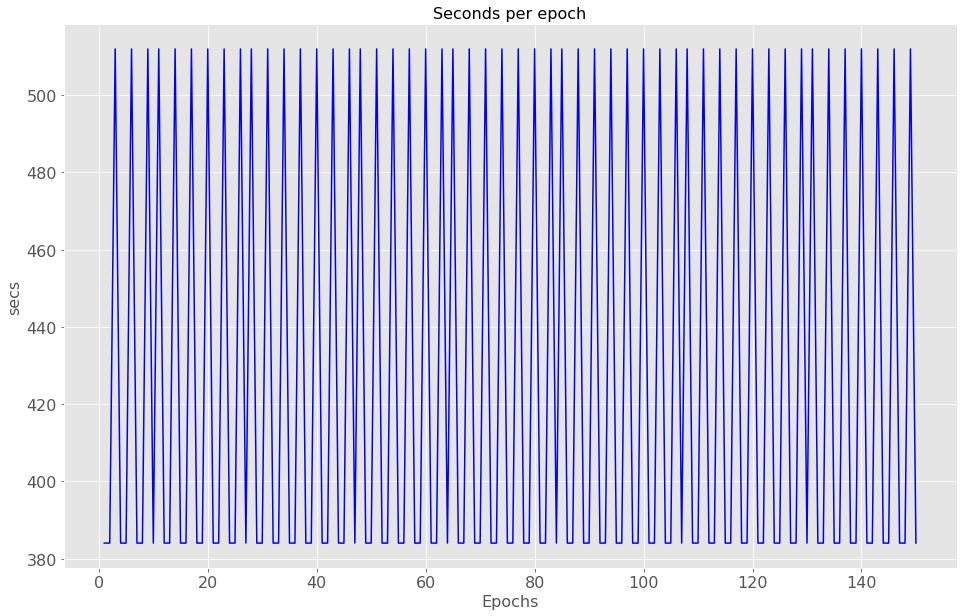

In [30]:
import matplotlib.pyplot as plt
title="Seconds per epoch"
ylabel="secs"
font = 16
plot_name = "time_" + plotname_extension

name=plt.figure(figsize=(16,10))#figsize=(3.487,3.487/1.618))
ax =plt.gca()

epoch_time = longest_run["Time/secs)"] - longest_run["Time/secs)"][0]
epoch_time_diff = epoch_time.diff()


#set ylim lower bound to zero
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_xlim(left=0)


epoch_time_diff.plot(x="Step", y="Value", color='b', ax=ax, alpha=1)#, label="time all")

name= plt.xlabel('Epochs', fontsize=font)
name= plt.ylabel(ylabel, fontsize=font)
name= plt.title(title, fontsize=font)
name = plt.xticks(fontsize=font, rotation=360)
name =  plt.yticks(fontsize=font, rotation=360)
#name= plt.legend(fontsize=font)

plt.savefig(("/afs/desy.de/user/a/axelheim/private/run_BsXHc/" + title + '_' + "TSD_BsXHc_15k_each_6trees_IDs_charge_1024_0.001_512_0.3_4" + ".pdf"))


In [32]:
print(epoch_time_diff)

0        NaN
1      384.0
2      384.0
3      512.0
4      384.0
       ...  
146    512.0
147    384.0
148    384.0
149    512.0
150    384.0
Name: Time/secs), Length: 151, dtype: float64


In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(epoch_time_diff)

0        NaN
1      384.0
2      384.0
3      512.0
4      384.0
5      384.0
6      512.0
7      384.0
8      384.0
9      512.0
10     384.0
11     512.0
12     384.0
13     384.0
14     512.0
15     384.0
16     384.0
17     512.0
18     384.0
19     384.0
20     512.0
21     384.0
22     384.0
23     512.0
24     384.0
25     384.0
26     512.0
27     384.0
28     512.0
29     384.0
30     384.0
31     512.0
32     384.0
33     384.0
34     512.0
35     384.0
36     384.0
37     512.0
38     384.0
39     384.0
40     512.0
41     384.0
42     384.0
43     512.0
44     384.0
45     384.0
46     512.0
47     384.0
48     512.0
49     384.0
50     384.0
51     512.0
52     384.0
53     384.0
54     512.0
55     384.0
56     384.0
57     512.0
58     384.0
59     384.0
60     512.0
61     384.0
62     384.0
63     512.0
64     384.0
65     512.0
66     384.0
67     384.0
68     512.0
69     384.0
70     384.0
71     512.0
72     384.0
73     384.0
74     512.0
75     384.0
76     384.0